In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Empezemos subiendo una página de una table de excel usando Pandas.

In [ ]:
df_table=pd.read_excel("./abf8683_TablesS1toS21.xlsx", sheet_name="S2", header=2)

In [ ]:
df_table.head(5)

,Gene,"Genetic exposure, variant type; allele frequency cut-off in %",Study,Beta (95% CI) per allele in SD units of BMI,p,"AAF, fraction of 1","Genotype counts, RR|RA|AA genotypes",Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,UKB,"-0.06\n (-0.08, -0.03)",0.000022,0.0056,"423,919|4,790|10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,MCPS,"-0.02\n (-0.17, 0.12)",0.764000,0.0009,"95,674|172|0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,GHS,"-0.10\n (-0.15, -0.05)",0.000160,0.0048,"119,906|1,155|0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GPR75,pLOF; AAF < 1%,UKB,"-0.34\n (-0.49, -0.19)",0.000007,0.0002,"428,572|147|0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GPR75,pLOF; AAF < 1%,MCPS,"-0.48\n (-0.82, -0.13)",0.007090,0.0002,"95,816|30|0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_table_small=df_table.iloc[:,0:6]
df_table_small.head(5)

,Gene,"Genetic exposure, variant type; allele frequency cut-off in %",Study,Beta (95% CI) per allele in SD units of BMI,p,"AAF, fraction of 1"
0,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,UKB,"-0.06\n (-0.08, -0.03)",0.000022,0.0056
1,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,MCPS,"-0.02\n (-0.17, 0.12)",0.764000,0.0009
2,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,GHS,"-0.10\n (-0.15, -0.05)",0.000160,0.0048
3,GPR75,pLOF; AAF < 1%,UKB,"-0.34\n (-0.49, -0.19)",0.000007,0.0002
4,GPR75,pLOF; AAF < 1%,MCPS,"-0.48\n (-0.82, -0.13)",0.007090,0.0002


In [ ]:
df_table_small["Beta"]=df_table_small["Beta (95% CI) per allele in SD units of BMI"].str.split("\n", n = 1, expand = True)[0].astype(float)
df_table_small.head(5)

,Gene,"Genetic exposure, variant type; allele frequency cut-off in %",Study,Beta (95% CI) per allele in SD units of BMI,p,"AAF, fraction of 1",Beta
0,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,UKB,"-0.06\n (-0.08, -0.03)",0.000022,0.0056,-0.06
1,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,MCPS,"-0.02\n (-0.17, 0.12)",0.764000,0.0009,-0.02
2,UHMK1,pLOF plus deleterious missense (5/5); AAF < 1%,GHS,"-0.10\n (-0.15, -0.05)",0.000160,0.0048,-0.10
3,GPR75,pLOF; AAF < 1%,UKB,"-0.34\n (-0.49, -0.19)",0.000007,0.0002,-0.34
4,GPR75,pLOF; AAF < 1%,MCPS,"-0.48\n (-0.82, -0.13)",0.007090,0.0002,-0.48


Vamos a graficar esta tabla

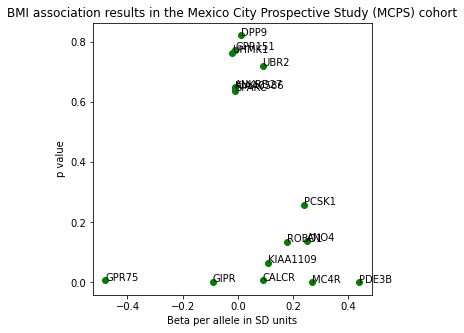

In [ ]:
df_plot=df_table_small[df_table_small["Study"]=="MCPS"]

# Plot the degree of each node
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_title('BMI association results in the Mexico City Prospective Study (MCPS) cohort')
ax.set_xlabel('Beta per allele in SD units')
ax.set_ylabel('p value')
ax.scatter(df_plot["Beta"],df_plot["p"], color='green')
for i, txt in enumerate(df_plot["Gene"].tolist()):
  ax.annotate(txt, (df_plot["Beta"].tolist()[i], df_plot["p"].tolist()[i]))
plt.show()

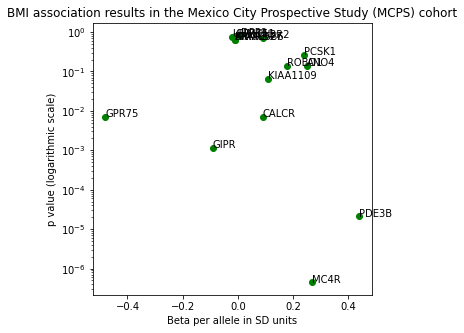

In [ ]:
df_plot=df_table_small[df_table_small["Study"]=="MCPS"]

# Plot the degree of each node
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_title('BMI association results in the Mexico City Prospective Study (MCPS) cohort')
ax.set_xlabel('Beta per allele in SD units')
ax.set_ylabel('p value (logarithmic scale)')
ax.scatter(df_plot["Beta"],df_plot["p"], color='green')
ax.set_yscale('log')
for i, txt in enumerate(df_plot["Gene"].tolist()):
  ax.annotate(txt, (df_plot["Beta"].tolist()[i], df_plot["p"].tolist()[i]))
plt.show()